# > Imports

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator
from datetime import datetime, timedelta
from scipy.stats import zscore
from dotenv import load_dotenv
import os

In [7]:
# Directory Paths
TS_DIR   = None
DATA_DIR = None

# Load directory paths from .env file
loaded = load_dotenv(dotenv_path="../expanse.env")
if loaded == True:
    TS_DIR   = os.environ['TS_DIR']
    DATA_DIR = os.environ['DATA_DIR']
    print(f"Loaded environment variables.")
else:
    print(f"Environment variables not loaded.")

Loaded environment variables.


# > Plots

## >> Time Series

### >>> Unique Source IPs (per country)

In [9]:
%%time

ru_pc_df = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_05_01_00_00/RU_uniq_src_ip.parquet.gzip')
ru_pc_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_04_01_00_00/RU_uniq_src_ip.parquet.gzip')

cn_pc_df = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_05_01_00_00/CN_uniq_src_ip.parquet.gzip')
cn_pc_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_04_01_00_00/CN_uniq_src_ip.parquet.gzip')

br_pc_df = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_05_01_00_00/BR_uniq_src_ip.parquet.gzip')
br_pc_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_04_01_00_00/BR_uniq_src_ip.parquet.gzip')

de_pc_df = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_05_01_00_00/DE_uniq_src_ip.parquet.gzip')
de_pc_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_04_01_00_00/DE_uniq_src_ip.parquet.gzip')

us_pc_df = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_05_01_00_00/US_uniq_src_ip.parquet.gzip')
us_pc_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_04_01_00_00/US_uniq_src_ip.parquet.gzip')

hk_pc_df = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_05_01_00_00/HK_uniq_src_ip.parquet.gzip')
hk_pc_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/geo_country/unfiltered/uniq_src_ip/2023_04_01_00_00/HK_uniq_src_ip.parquet.gzip')

CPU times: user 259 ms, sys: 100 ms, total: 359 ms
Wall time: 1.96 s


In [10]:
%%time

ru_pc_df = pd.concat([ru_pc_df, ru_pc_df2])
cn_pc_df = pd.concat([cn_pc_df, cn_pc_df2])
br_pc_df = pd.concat([br_pc_df, br_pc_df2])
de_pc_df = pd.concat([de_pc_df, de_pc_df2])
us_pc_df = pd.concat([us_pc_df, us_pc_df2])
hk_pc_df = pd.concat([hk_pc_df, hk_pc_df2])

CPU times: user 57.9 ms, sys: 7.08 ms, total: 65 ms
Wall time: 68.1 ms


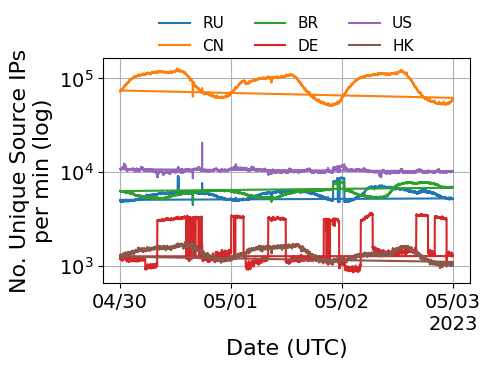

In [11]:
plt.figure(figsize=(5,4))

plt.plot(ru_pc_df['2023-04-30':'2023-05-02'].uniq_src_ip, label='RU')
plt.plot(cn_pc_df['2023-04-30':'2023-05-02'].uniq_src_ip, label='CN')
plt.plot(br_pc_df['2023-04-30':'2023-05-02'].uniq_src_ip, label='BR')
plt.plot(de_pc_df['2023-04-30':'2023-05-02'].uniq_src_ip, label='DE')
plt.plot(us_pc_df['2023-04-30':'2023-05-02'].uniq_src_ip, label='US')
plt.plot(hk_pc_df['2023-04-30':'2023-05-02'].uniq_src_ip, label='HK')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fontsize=11, frameon=False)
plt.ylabel('No. Unique Source IPs\nper min (log)', fontsize=16)
plt.xlabel('Date (UTC)', fontsize=16)
plt.yscale('symlog')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.gca().set_xticks(pd.date_range(start='2023-04-30', end='2023-05-03', freq='D'))
plt.gca().set_xticklabels(['04/30', '05/01', '05/02', '05/03\n2023'])

plt.grid()
plt.tight_layout()
# plt.savefig('method_country_usp.pdf', bbox_inches='tight')

### >>> Packet Counts (per TCP dest. port)

In [21]:
%%time

ports_df1 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/pkt_cnt/2023_05_01_00_00/tcp_dst_0-255_pkt_cnt.parquet.gzip')
ports_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/pkt_cnt/2023_04_01_00_00/tcp_dst_0-255_pkt_cnt.parquet.gzip')

ports_df3 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/pkt_cnt/2023_05_01_00_00/tcp_dst_256-511_pkt_cnt.parquet.gzip')
ports_df4 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/pkt_cnt/2023_04_01_00_00/tcp_dst_256-511_pkt_cnt.parquet.gzip')

CPU times: user 11.1 s, sys: 3.96 s, total: 15.1 s
Wall time: 8.54 s


In [22]:
%%time

ports_df1 = pd.concat([ports_df1, ports_df2])
ports_df2 = pd.concat([ports_df3, ports_df4])

CPU times: user 4.93 s, sys: 2.05 s, total: 6.99 s
Wall time: 6.88 s


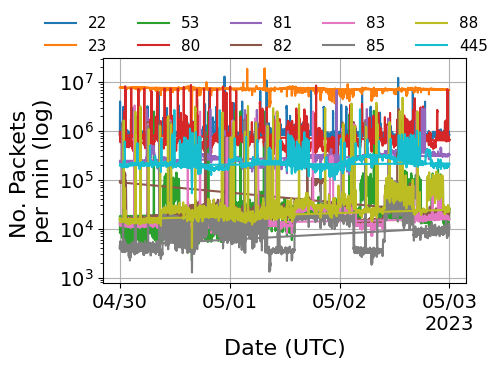

In [24]:
plt.figure(figsize=(5,4))

plt.plot(ports_df1.loc[pd.IndexSlice[:, '22'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='22')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '23'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='23')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '53'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='53')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '80'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='80')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '81'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='81')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '82'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='82')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '83'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='83')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '85'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='85')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '88'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='88')
plt.plot(ports_df2.loc[pd.IndexSlice[:, '445'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].pkt_cnt, label='445')

plt.legend(loc='upper center', bbox_to_anchor=(0.45, 1.25), ncol=5, fontsize=11, frameon=False)
plt.ylabel('No. Packets \nper min (log)', fontsize=16)
plt.xlabel('Date (UTC)', fontsize=16)
plt.yscale('log')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.gca().set_xticks(pd.date_range(start='2023-04-30', end='2023-05-03', freq='D'))
plt.gca().set_xticklabels(['04/30', '05/01', '05/02', '05/03\n2023'])

plt.grid()
plt.tight_layout()
# plt.savefig('method_port_pc.pdf', bbox_inches='tight')

### >>> Unique Source IPs (per country)

In [25]:
%%time

ports_df1 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/uniq_src_ip/2023_05_01_00_00/tcp_dst_0-255_uniq_src_ip.parquet.gzip')
ports_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/uniq_src_ip/2023_04_01_00_00/tcp_dst_0-255_uniq_src_ip.parquet.gzip')

ports_df3 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/uniq_src_ip/2023_05_01_00_00/tcp_dst_256-511_uniq_src_ip.parquet.gzip')
ports_df4 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/uniq_src_ip/2023_04_01_00_00/tcp_dst_256-511_uniq_src_ip.parquet.gzip')

CPU times: user 11.1 s, sys: 4.41 s, total: 15.5 s
Wall time: 8.65 s


In [26]:
%%time

ports_df1 = pd.concat([ports_df1, ports_df2])
ports_df2 = pd.concat([ports_df3, ports_df4])

CPU times: user 5.02 s, sys: 2.02 s, total: 7.04 s
Wall time: 6.93 s


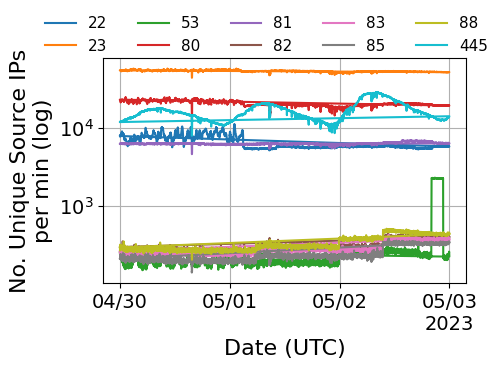

In [27]:
plt.figure(figsize=(5,4))

plt.plot(ports_df1.loc[pd.IndexSlice[:, '22'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='22')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '23'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='23')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '53'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='53')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '80'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='80')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '81'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='81')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '82'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='82')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '83'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='83')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '85'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='85')
plt.plot(ports_df1.loc[pd.IndexSlice[:, '88'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='88')
plt.plot(ports_df2.loc[pd.IndexSlice[:, '445'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip, label='445')

plt.legend(loc='upper center', bbox_to_anchor=(0.45, 1.25), ncol=5, fontsize=11, frameon=False)

plt.ylabel('No. Unique Source IPs\nper min (log)', fontsize=16)
plt.xlabel('Date (UTC)', fontsize=16)
plt.yscale('symlog')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

plt.gca().set_xticks(pd.date_range(start='2023-04-30', end='2023-05-03', freq='D'))
plt.gca().set_xticklabels(['04/30', '05/01', '05/02', '05/03\n2023'])

plt.grid()
plt.tight_layout()
# plt.savefig('method_port_usp.pdf', bbox_inches='tight')

### >>> Processed Time Series

In [28]:
%%time
ports_df1 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/uniq_src_ip/2023_05_01_00_00/tcp_dst_0-255_uniq_src_ip.parquet.gzip')
ports_df2 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/uniq_src_ip/2023_04_01_00_00/tcp_dst_0-255_uniq_src_ip.parquet.gzip')

ports_df3 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/uniq_src_ip/2023_05_01_00_00/tcp_dst_256-511_uniq_src_ip.parquet.gzip')
ports_df4 = pd.read_parquet(f'{TS_DIR}/ucsd-nt/transport_port/unfiltered/uniq_src_ip/2023_04_01_00_00/tcp_dst_256-511_uniq_src_ip.parquet.gzip')

ports_df1 = pd.concat([ports_df1, ports_df2])
ports_df2 = pd.concat([ports_df3, ports_df4])

ts1 = ports_df1.loc[pd.IndexSlice[:, '80'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip
ts2 = ports_df2.loc[pd.IndexSlice[:, '445'], :].reset_index().set_index('_time')['2023-04-30':'2023-05-02'].uniq_src_ip

CPU times: user 16 s, sys: 6.25 s, total: 22.2 s
Wall time: 15.6 s


In [29]:
%%time

segments1 = ts1.groupby(pd.Grouper(freq='1d'))
normalized_segments1 = segments1.apply(lambda x: zscore(x, ddof=1))

segments2 = ts2.groupby(pd.Grouper(freq='1d'))
normalized_segments2 = segments2.apply(lambda x: zscore(x, ddof=1))

CPU times: user 9.68 ms, sys: 0 ns, total: 9.68 ms
Wall time: 9.51 ms


Text(2023-05-02 12:00:00, 3, '$\\hat{\\mathbf{X}}^3_{dport445}$')

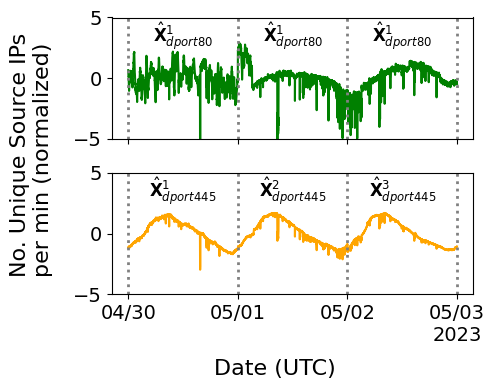

In [40]:
fig, axs = plt.subplots(2, 1, layout='tight', figsize=(5,4), sharex=True, sharey=True)

# Access only the 2nd level of the multi-index
axs[0].plot(normalized_segments1.index.get_level_values(1), normalized_segments1.values, color='green')
axs[1].plot(normalized_segments2.index.get_level_values(1), normalized_segments2.values, color='orange')


axs[0].set_ylim([-5, 5])

# axs[0].grid()
# axs[1].grid()

xticks = pd.date_range(start='2023-04-30', end='2023-05-03', freq='D')
axs[1].set_xticks(xticks)
axs[1].set_xticklabels(['04/30', '05/01', '05/02', '05/03\n2023'])

axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=14)

fig.supylabel('No. Unique Source IPs\nper min (normalized)', fontsize=16, y=0.6)
fig.supxlabel('Date (UTC)', fontsize=16, x=0.55, y=0.04)

for ax in axs:
    for tick in xticks:
        ax.axvline(x=tick, color='gray', linestyle=':', linewidth=2)

axs[0].text(pd.Timestamp('2023-04-30 12:00'), 3, "$\hat{\mathbf{X}}^1_{dport80}$", horizontalalignment='center', fontsize=12)
axs[0].text(pd.Timestamp('2023-05-01 12:00'), 3, "$\hat{\mathbf{X}}^1_{dport80}$", horizontalalignment='center', fontsize=12)
axs[0].text(pd.Timestamp('2023-05-02 12:00'), 3, "$\hat{\mathbf{X}}^1_{dport80}$", horizontalalignment='center', fontsize=12)

axs[1].text(pd.Timestamp('2023-04-30 12:00'), 3, "$\hat{\mathbf{X}}^1_{dport445}$", horizontalalignment='center', fontsize=12)
axs[1].text(pd.Timestamp('2023-05-01 12:00'), 3, "$\hat{\mathbf{X}}^2_{dport445}$", horizontalalignment='center', fontsize=12)
axs[1].text(pd.Timestamp('2023-05-02 12:00'), 3, "$\hat{\mathbf{X}}^3_{dport445}$", horizontalalignment='center', fontsize=12)

# plt.savefig('method_prep_example.pdf', bbox_inches='tight')

## >> Matrices